In [1]:
import numpy as np

from sklearn import tree
from sklearn import datasets
from sklearn import model_selection

import graphviz

# Decision trees

(example from sklearn)

In [2]:
dataset = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset.data, dataset.target, test_size=0.33, random_state=3)

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [4]:
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

Accuracy: 100 


### And what if we look at the accuracy over the test data?

In [5]:
predictions = clf.predict(X_test)
print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Accuracy: 95 


# Random Forest

In [6]:
from sklearn import ensemble

In [7]:
clf = ensemble.RandomForestClassifier(random_state=2)
clf.fit(X_train, y_train);

In [8]:
predictions = clf.predict(X_train)
print ('Accuracy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))

Accuracy: 100 


In [9]:
predictions = clf.predict(X_test)
print ('Accuracy: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Accuracy: 96 


In [10]:
def draw_random_forest_tree(index):
    assert(len(clf.estimators_) > index)
    dot_data = tree.export_graphviz(clf.estimators_[index], out_file=None, 
                     feature_names=dataset.feature_names,  
                     class_names=dataset.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

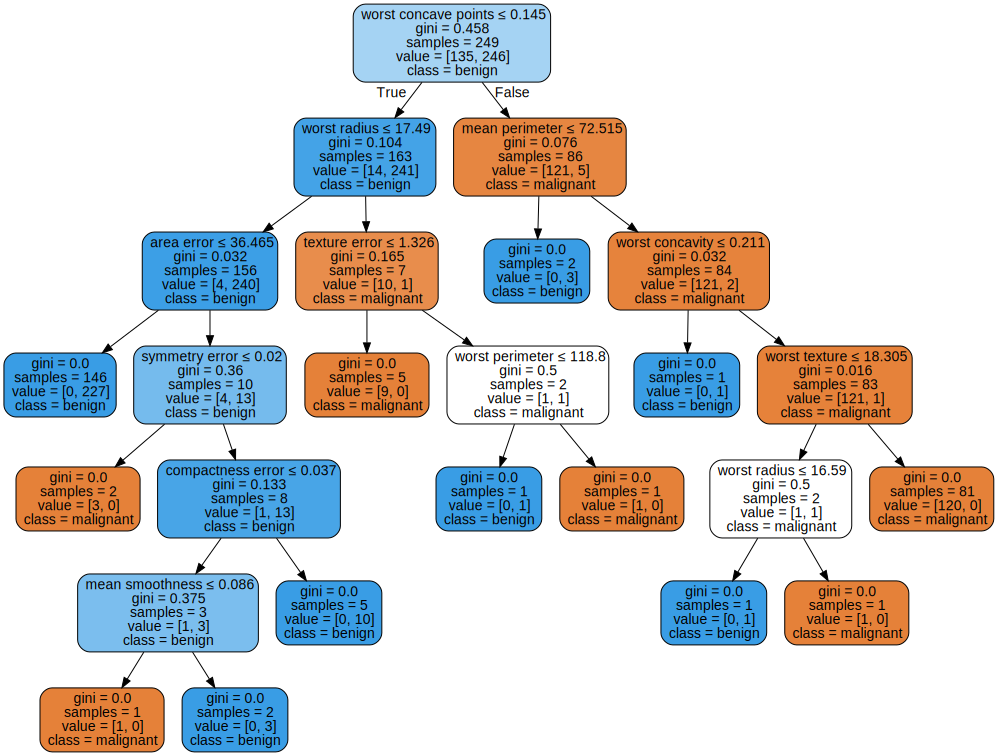

In [11]:
draw_random_forest_tree(1)

# An interesting example on how to use Random Forests: https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/data